In [1]:

# import lib

import pandas as pd
import matplotlib.pyplot as plt


In [8]:
# load data from csv
data=pd.read_csv("bank_dataset.csv")
data

,Unnamed: 0,Unique_Identifier,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,45206,51.0,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,45207,71.0,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,45208,72.0,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,45209,57.0,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
subscribed_customers = data[data['y'] == 'yes']

In [10]:
subscriber_counts = subscribed_customers['job'].value_counts()

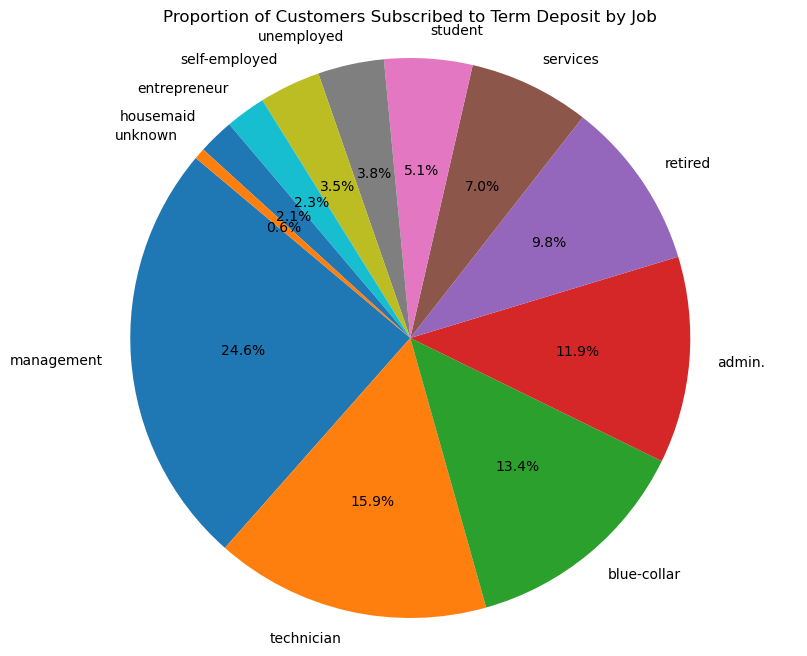

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(subscriber_counts, labels=subscriber_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers Subscribed to Term Deposit by Job')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

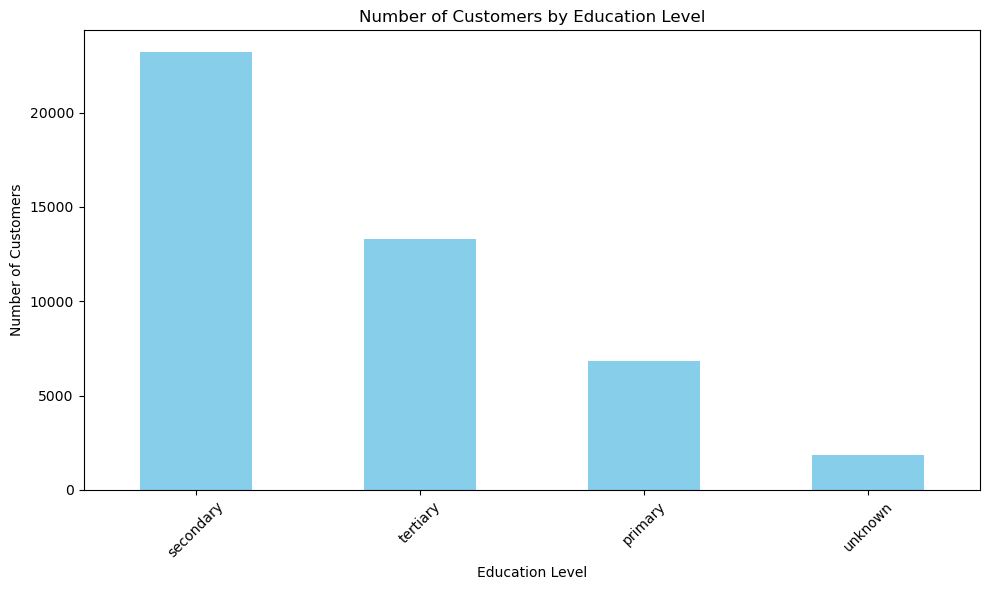

The most common education level among customers is: secondary


In [12]:
# Count the number of customers for each education level
education_counts = data['education'].value_counts()

# Identify the most common education level
most_common_education = education_counts.idxmax()

# Plot the bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The most common education level among customers is:", most_common_education)

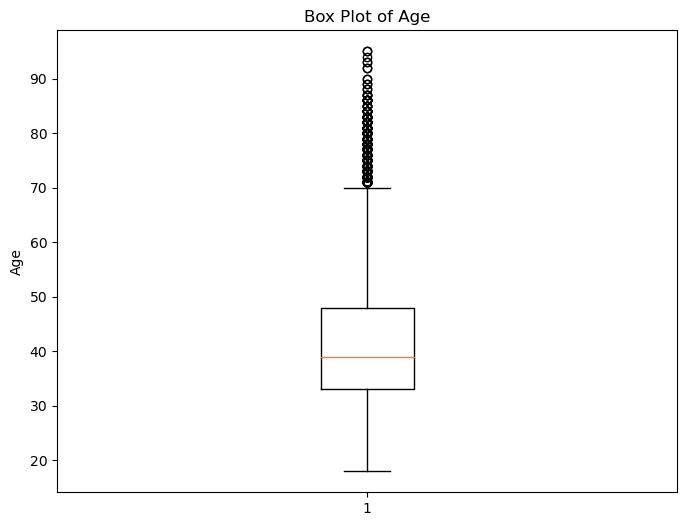

In [13]:
# Create a unique identifier 
data['ID'] = range(1, len(data) + 1)

# Plot a box plot for the age column
plt.figure(figsize=(8, 6))
plt.boxplot(data['age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

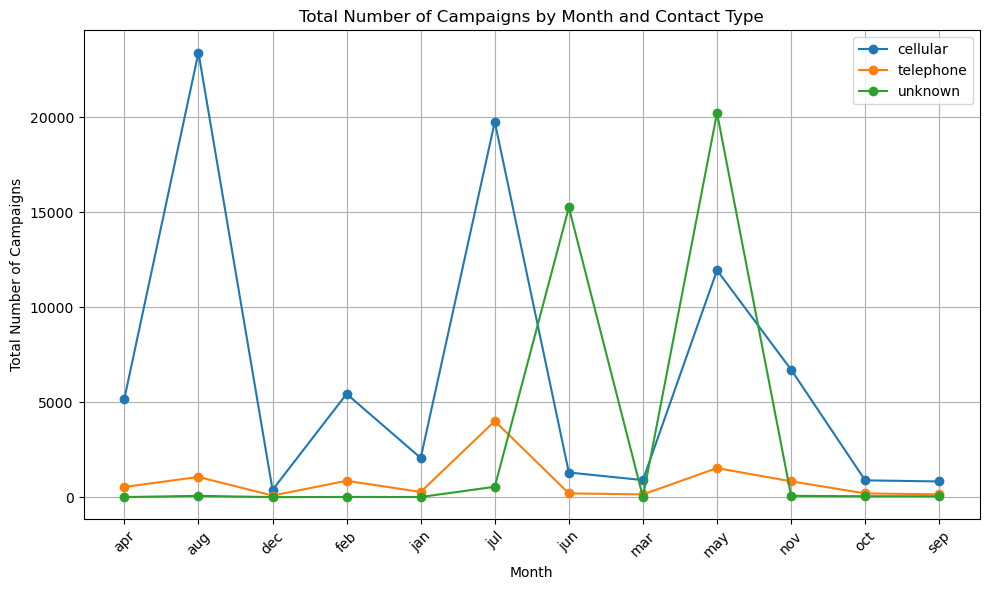

In [14]:
campaigns_by_month_contact = data.groupby(['month', 'contact'])['campaign'].sum().reset_index()

# Plot a line chart
plt.figure(figsize=(10, 6))
for contact_type in campaigns_by_month_contact['contact'].unique():
    plt.plot(campaigns_by_month_contact[campaigns_by_month_contact['contact'] == contact_type]['month'],
             campaigns_by_month_contact[campaigns_by_month_contact['contact'] == contact_type]['campaign'],
             marker='o', label=contact_type)
plt.title('Total Number of Campaigns by Month and Contact Type')
plt.xlabel('Month')
plt.ylabel('Total Number of Campaigns')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()